### Importing all the necessary libraries 

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

### Creating a dataframe by importing the dataset file
 * Specifying the na-values
 * Parsing dates to the required pandas format

In [58]:
data = pd.read_csv('data.csv', encoding='latin1', na_values=['No Info', 'unknown amount'], parse_dates=['Est. Founding Date', 'Last Funding Date'])
print(data.shape)
data.head(5)
#data['Last Funding Date']

(472, 116)


,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Company2,Success,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,0.0,8.0
2,Company3,Success,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,0.0,9.0
3,Company4,Success,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0
4,Company5,Success,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0


In [59]:
#len(data)
#data['Client Reputation'].isnull().sum() output-272 then div it by 472 it will give 0.580508
#302 is the threshhold for NAN values. NAN values lesser than 302 will remove that columns

### Remove the columns which have a high proportion of missing data
 * Threshold being set here as a 36% of missing values in a particular column
 * Based on that 9 columns are being removed

In [60]:
missing_percentage = 0.36
cols_to_drop = data.isnull().sum() / len(data)
cols_to_drop
print(cols_to_drop[cols_to_drop > missing_percentage])
data = data.dropna(axis=1, thresh=(1-missing_percentage)*len(data))
data.shape

Employees count MoM change                    0.434322
Number of  of Partners of company             0.815678
Degree from a Tier 1 or Tier 2 university?    0.491525
Top management similarity                     0.597458
Number of  of Research publications           0.707627
Employee benefits and salary structures       0.743644
Client Reputation                             0.580508
Gartner hype cycle stage                      0.364407
Time to maturity of technology (in years)     0.364407
dtype: float64


(472, 107)

### Remove useless data 

In [62]:
del data['year of founding']
# Because 
#(2014 - data['year of founding'] != data['Age of company in years'])

### Remove whitespaces and lowercase all the strings.
 * Here 'Has the team size grown' column is being used as an example

In [63]:
print(data['Has the team size grown'].unique())
num_data = data.select_dtypes(include=[np.number])
#num_data.describe()
print(num_data.shape)
str_data = data.select_dtypes(include=['object'])
#str_data.describe()
print(str_data.shape)

parser = lambda x: str(x).lower().strip() if pd.isnull(x) == False else x
str_data = str_data.applymap(parser)
#str_data.describe()
df = pd.concat([num_data, str_data], axis=1)
#df.head()
print(df['Has the team size grown'].unique())


['No' 'Yes' 'yes' nan 'YES']
(472, 40)
(472, 64)
['no' 'yes' nan]


### Create a numerical target column 
 * Use the one-hot encoding where '1' means success and '0' means failure

In [64]:
df['Target'] = df['Dependent-Company Status'].map({'failed': 0, 'success': 1})
df['Target']

0      1
1      1
2      1
3      1
4      1
      ..
467    0
468    0
469    0
470    0
471    0
Name: Target, Length: 472, dtype: int64

### Success Prediction
 * Here in this dataset we have two types of variable one categorical and the other is numerical variable. So we have to find their correlation to the target variable respectively.
 * Find Categoricl variables correlation to target variable
 * Find Numerical variables correlation to target variable

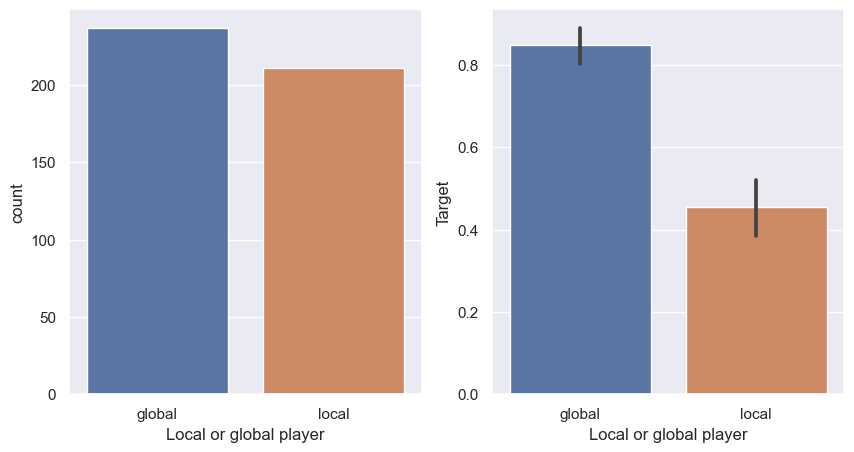

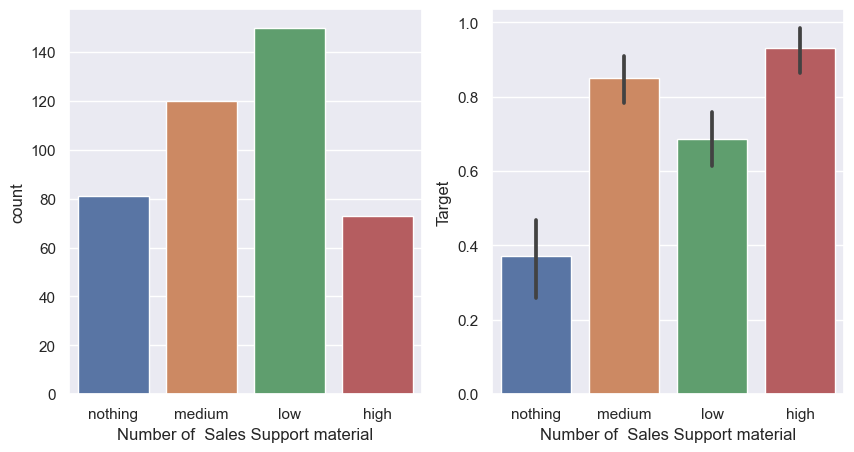

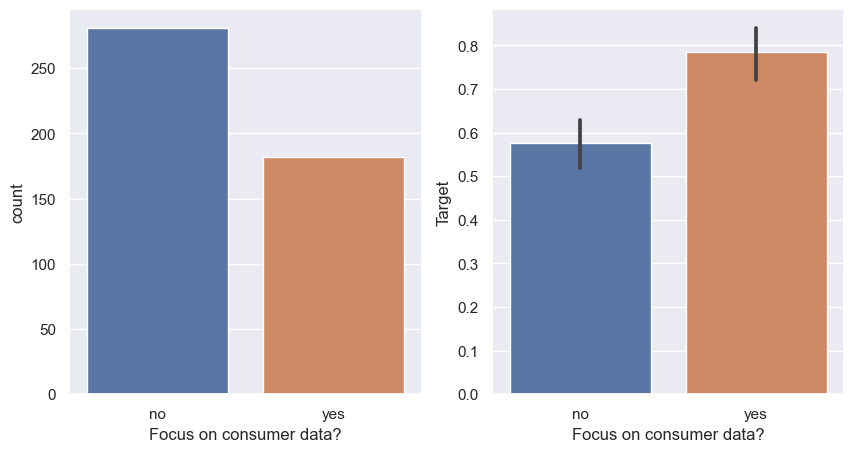

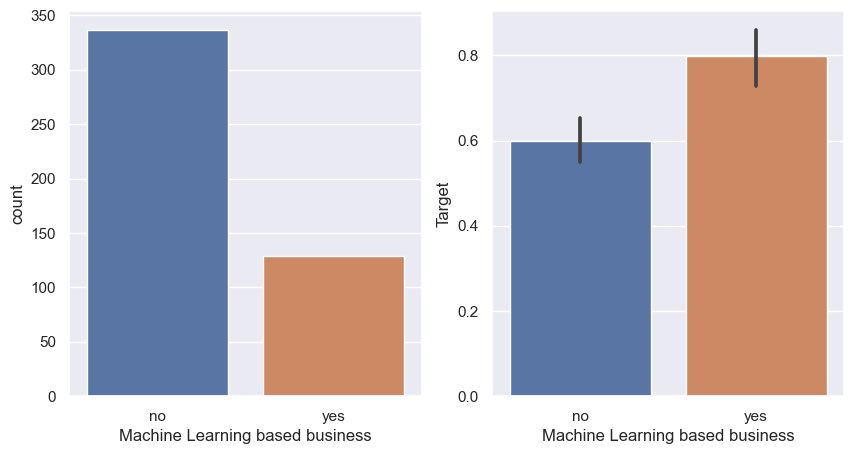

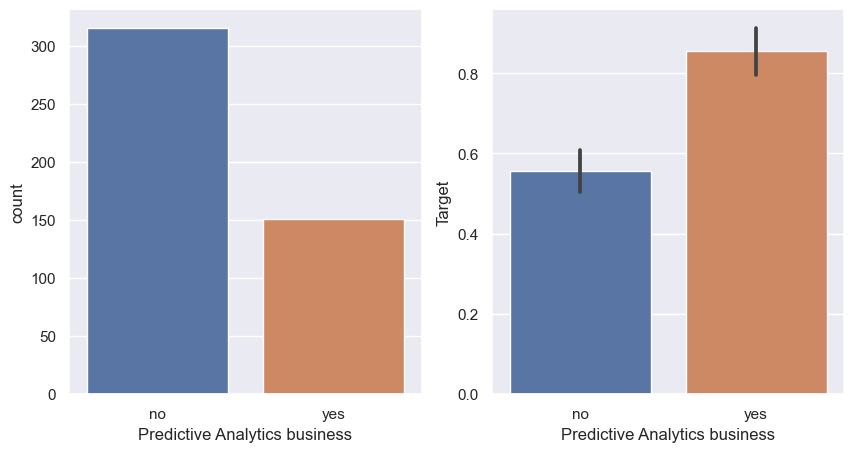

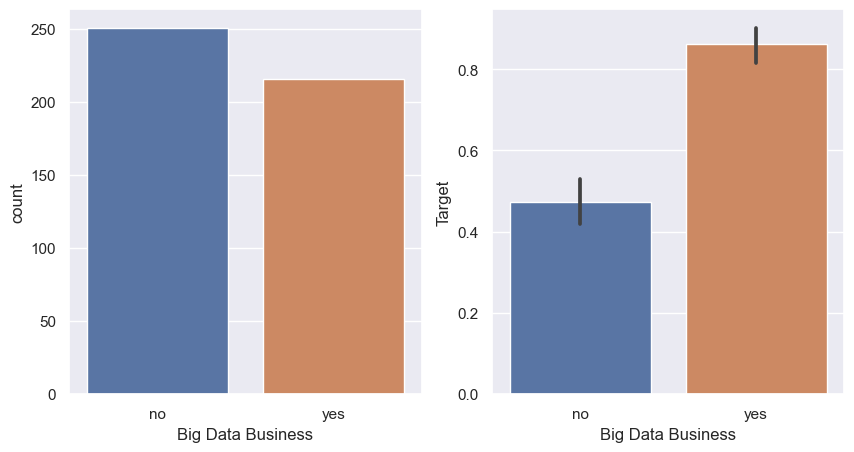

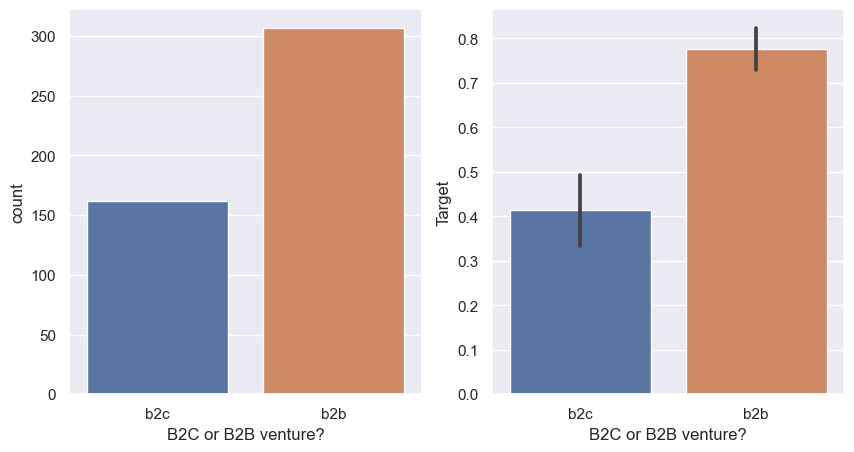

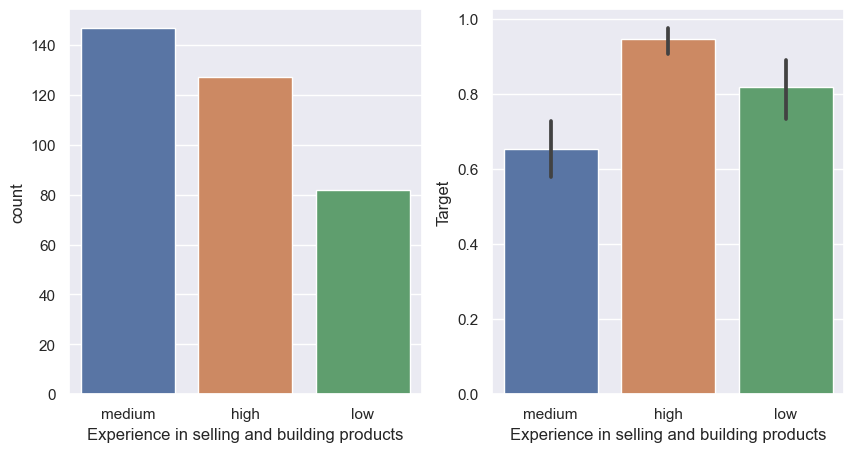

In [65]:
features = ['Local or global player', 'Number of  Sales Support material', 'Focus on consumer data?', 
             'Machine Learning based business', 'Predictive Analytics business',
            'Big Data Business', 'B2C or B2B venture?', 'Experience in selling and building products']
for attr_name in features:
    fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))
    
    df[attr_name].fillna(df[attr_name].dropna().mode(), inplace=True)
    
    sns.countplot(x=attr_name, data=df, ax=axis1)
    
    #Average
    sns.barplot(x=attr_name, y='Target', data=df, ax=axis2)

### Feature Engineering
 * Here we are creating two additional features based on previously presented features.

In [68]:
#df['Investors'].describe()
pipe_parser = lambda x: str(x).count('|')
df['investors_count'] = df['Investors'].apply(pipe_parser)
df['industry_count'] = df['Industry of company'].apply(pipe_parser)

 * How numerical variables are correlated to the target variable.

0.0 7.0


C:\Users\Mahad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.0 128.75


C:\Users\Mahad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.0 3.8999999999999773


C:\Users\Mahad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.0 361.5


C:\Users\Mahad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.0 11.22004357


C:\Users\Mahad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.0 25.0


C:\Users\Mahad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.0 9.449999999999989


C:\Users\Mahad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.0 3.0


C:\Users\Mahad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


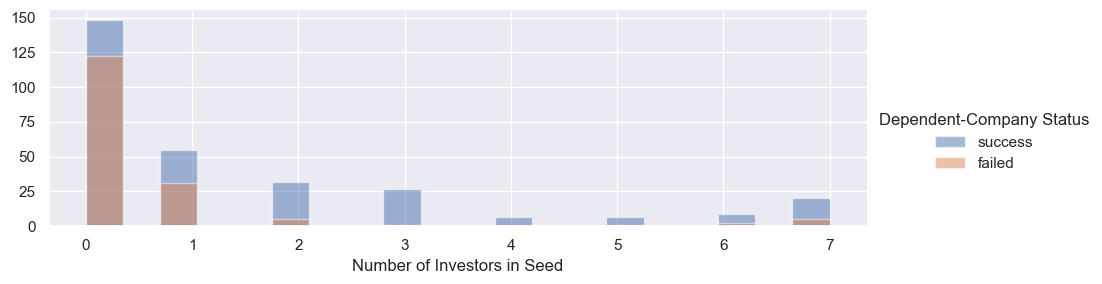

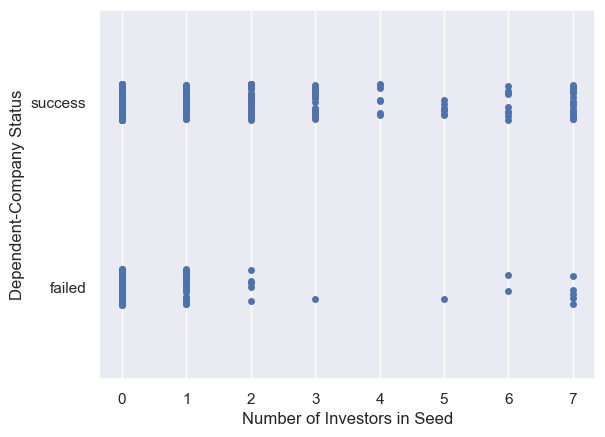

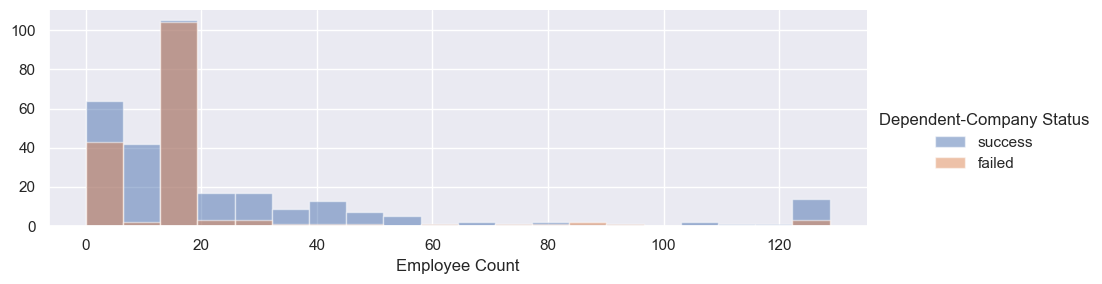

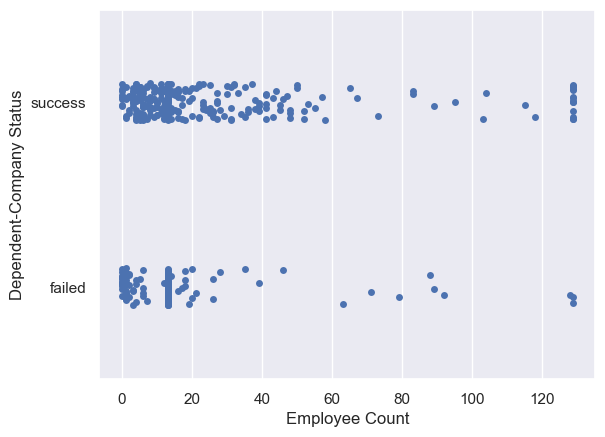

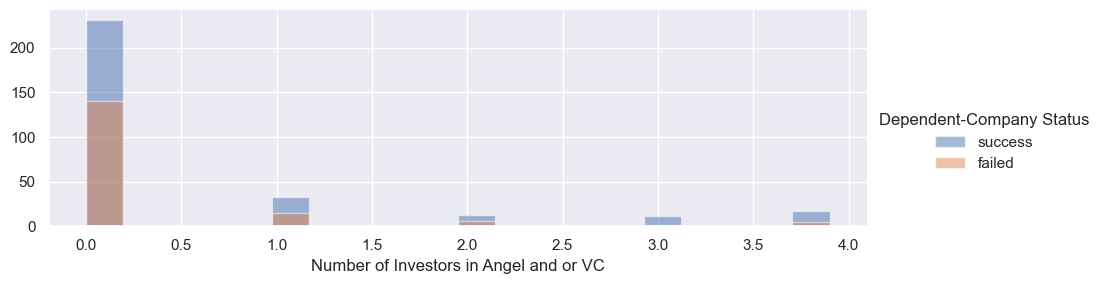

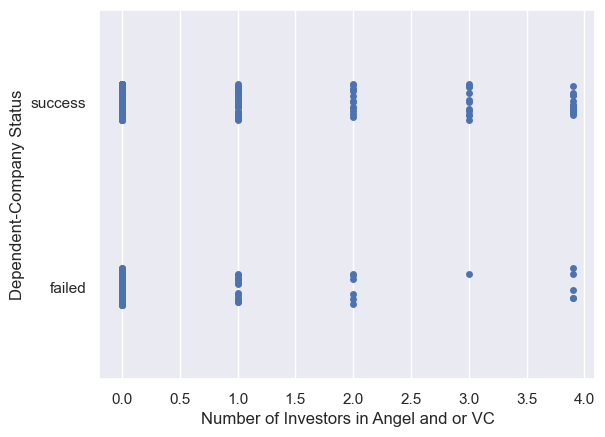

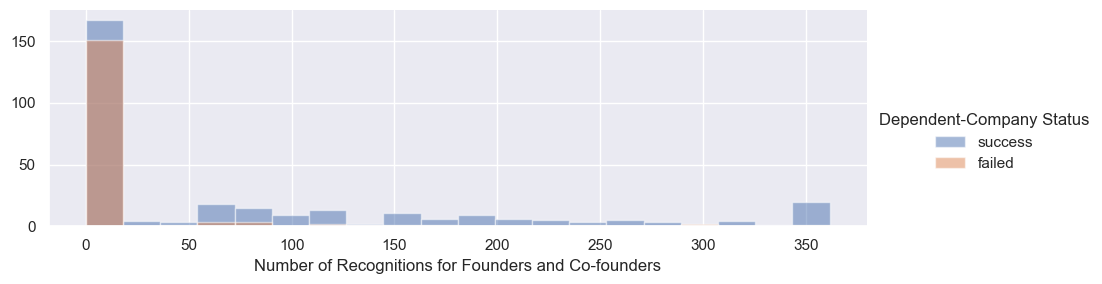

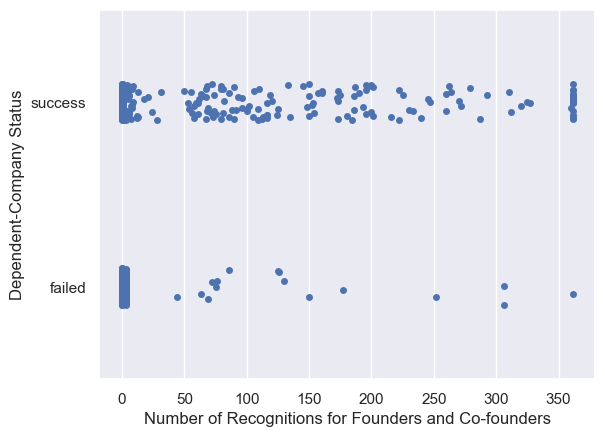

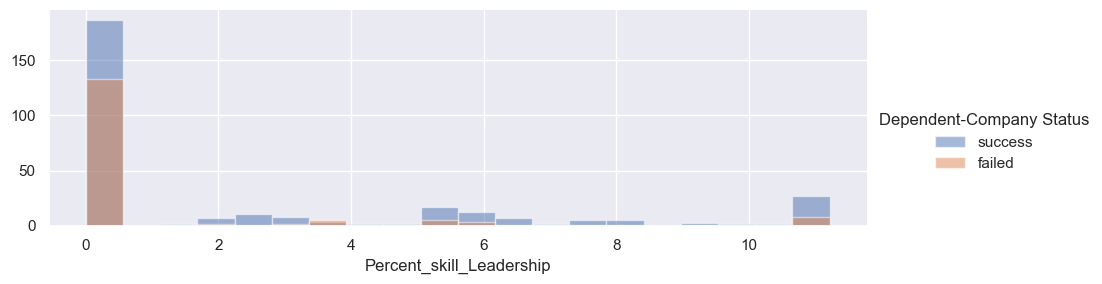

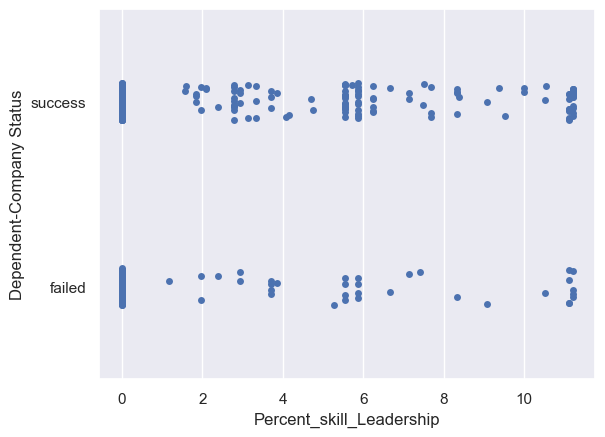

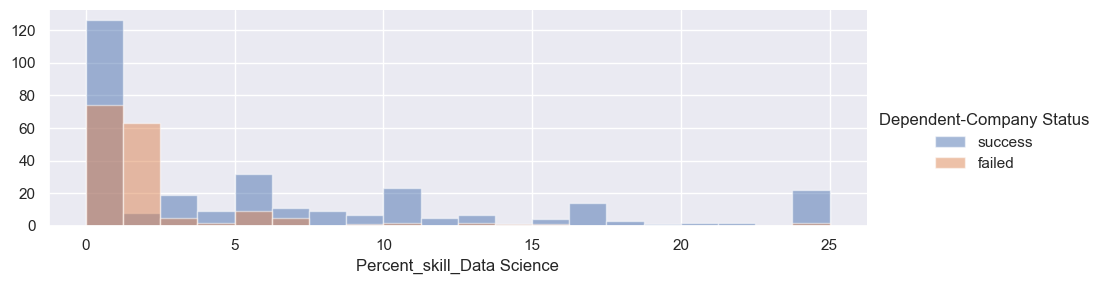

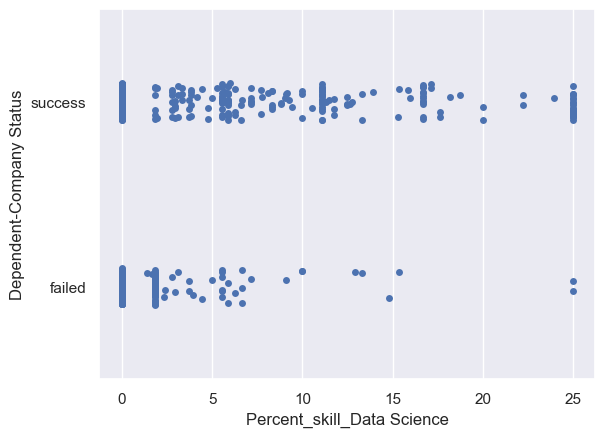

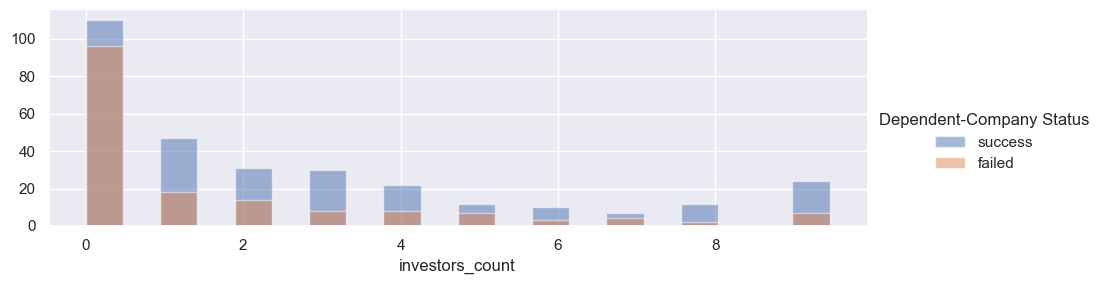

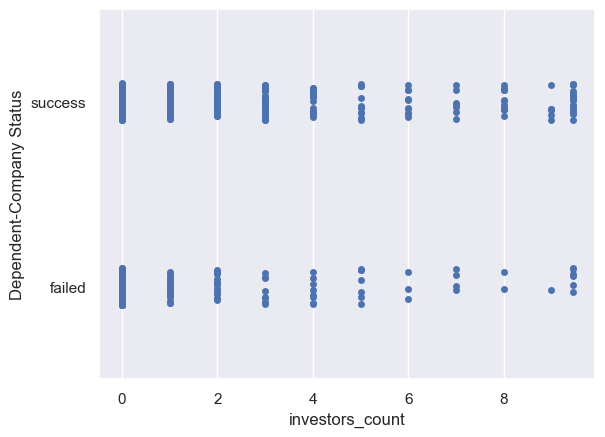

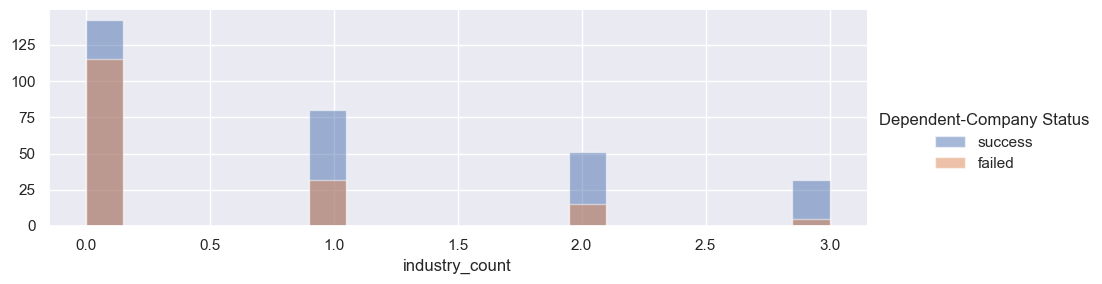

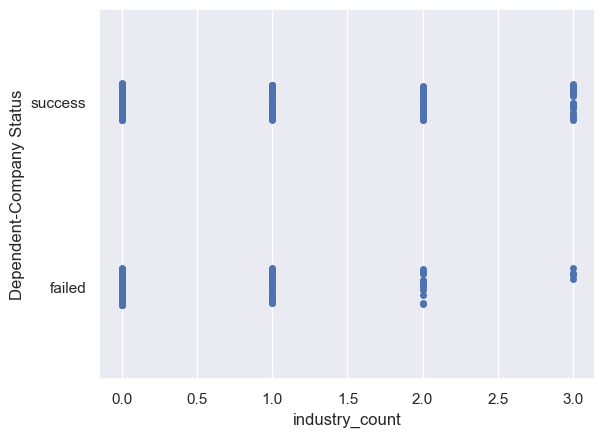

In [69]:
features = ['Number of Investors in Seed','Employee Count','Number of Investors in Angel and or VC', 
            'Number of Recognitions for Founders and Co-founders', 'Percent_skill_Leadership',
            'Percent_skill_Data Science', 'investors_count', 'industry_count']
for attr_name in features:
    q1 = df[attr_name].quantile(0.05)
    q3 = df[attr_name].quantile(0.95)
    print(q1, q3)
    df[attr_name] = df[attr_name].clip(q1,q3)
    
    df[attr_name].fillna(df[attr_name].dropna().median(), inplace=True)
    
    facet = sns.FacetGrid(df, hue="Dependent-Company Status",aspect=3)
    facet.map(plt.hist,attr_name, alpha=.5, bins=20)
    facet.add_legend()
    
    plt.figure()
    sns.stripplot(data=df, x=attr_name, y="Dependent-Company Status", jitter=True)
    
    #plt.figure()
    #sns.boxplot(x=attr_name, y="Dependent-Company Status", data=df, whis=np.inf)

### Hypothesis
 * Here in this hypothesis I found out that usually a startup with investors like Y combinator, Andreessen Horowitz or Sequoia Capital have a succession rate of more than 85%.

In [70]:
big_investors = 'y combinator|andreessen horowitz|sequoia capital'
df['big_investors'] = df['Investors'].str.contains(big_investors, na=False).astype(int)
df[(df['big_investors'] == 1)]["Target"].sum() / float(df['big_investors'].sum())

0.8518518518518519

### DecisionTreeClassifier
 * Data split is 70,30
 * NaN values are being filled with the median of that particular column.

In [71]:
def features_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

(330, 12) (330,) (142, 12) (142,)
              precision    recall  f1-score   support

           0       0.60      0.76      0.67        45
           1       0.87      0.76      0.81        97

    accuracy                           0.76       142
   macro avg       0.73      0.76      0.74       142
weighted avg       0.78      0.76      0.77       142



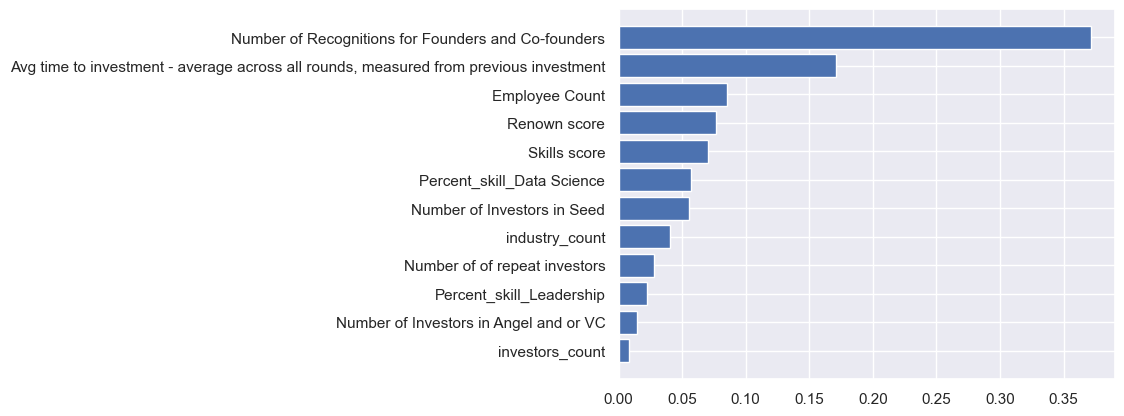

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model_df = df[['Target', 'Number of Investors in Seed','Employee Count','Number of Investors in Angel and or VC', 
            'Number of Recognitions for Founders and Co-founders', 'Percent_skill_Leadership',
            'Percent_skill_Data Science', 'investors_count', 'industry_count', 
            'Number of of repeat investors', 'Skills score', 'Avg time to investment - average across all rounds, measured from previous investment', 'Renown score'
              ]]

model_df = model_df.fillna(model_df.median())
train, test = train_test_split(model_df, test_size = 0.3, random_state=42)

X_train = train.drop("Target", axis=1)
Y_train = train["Target"]
X_test = test.drop("Target", axis=1)
Y_test = test["Target"]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

classifier = DecisionTreeClassifier(class_weight='balanced')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
# .reshape(classifier.coef_.shape[1])
features_importances(classifier.feature_importances_, model_df.drop('Target', axis=1))